# Introduction to Dynamical Systems

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl

In [2]:
#Plot configurations
mpl.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.grid"] = True 

### Euler Method (Tangent Line Method)

The tangent line approximation of $y$ at $t$ can be written as:
\begin{align}
y(t+h) &= y(t) + hf(y(t))
\end{align}

When the distance $\|t_1-t_0\|$ is very small, this is a good approximation. The idea is to have a very small fixed time interval $d$ and iteratively approximate the values of $y$ around some neighborhood of $t_0$.

In [3]:
def Euler(f, y0, t):  #Euler integrator
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(len(t) - 1):
        dt = t[i+1] - t[i]
        y[i+1]=y[i]+dt*f(y[i],t[i])
    return y

### Heun's Method (Runge-Kutta $2^{nd}$ order Method)

Heun method is improved version of Euler's, a predictor-corrector method. The method uses dynamics to predict the slope at next step, then corrects Euler's method by averaging the tangents.

This method is a $2^{nd}$ order accurate method which means local error is on the order of $\mathcal{0}(h^3)$.

\begin{align}
\tilde{y}(t+h) &= y(t)+hf(y(t)) \\
y(t+h) &= y(t)+ \frac{h}{2}(f(y(t) + f(\tilde{y}(t+h))) \\
\end{align}

In [4]:
def Heun(f, y0, t):  # Heun integrator
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        dt = t[i+1] - t[i]
        y_tilde = y[i] + dt*f(y[i],t[i]) # Euler formulation
        y[i+1] = y[i] + 0.5*dt*(f(y[i],t[i])+f(y_tilde,t[i]+dt))
    return y

### Runge-Kutta $4^{th}$ order Method
RK4 method, the most famous member of the Runge-Kutta family, is a $4^{th}$ order accurate method which means local error is on the order of $\mathcal{0}(h^5)$. The method is based on the following:

\begin{align}
y(t+h) &= y(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)\\
k_1 &= hf(t,y(t))\\
k_2 &= hf(t+\frac{h}{2}, y(t)+\frac{k_1}{2})\\
k_3 &= hf(t+\frac{h}{2}, y(t)+\frac{k_2}{2})\\
k_4 &= hf(t+h, y(t)+k_3)\\
\end{align}

In [5]:
def rk4(f, y0, t): #RK4 integrator
    n = len(t)
    m = len(y0)
    y = np.zeros((n,m))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(y[i], t[i])
        k2 = h * f(y[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(y[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(y[i] + k3, t[i+1])
        y[i+1] = y[i] + (k1 + 2.0 * ( k2 + k3 ) + k4)/6.0
    return y

### 1-d Differential Equation
We define a $1^{st}$ order differential equation with the general form $\dot{y}=f(y,t)$ where $\dot{y}$ is the derivative of the function $y(t)$ with respect to time $t$.<br>
For a simple example, let us choose the equation $\dot{y}=2y$
with the initial condition that $y(0)=1$. 

#### Exact Solution

We can solve this equation analytically to find an explicit formulation: $y(t)= Ce^{2t}$ where $C$ is some arbitrary constant. Plugging the initial value $y(0)=1$, we can deduce that $C=1$. So the exact solution can be explicitly represented by the function:<br>
$y(t)=e^{2t}$

In [6]:
def ydot(y,t): 
     return 2*y 

In [7]:
y0 = [1] #initial condition
t_init = 0 # initial time
t_final = 4 # final time
h = 0.3 # step size dt
t = np.arange(t_init,t_final,h) # arange time span
y_euler = Euler(ydot, y0, t) # call euler integrator
y_heun = Heun(ydot, y0, t) # call heun integrator
y_rk4 = rk4(ydot, y0, t)# call runge-kutta 4th integrator

In [8]:
# Analytical solution
y_exact = np.exp(2*t)

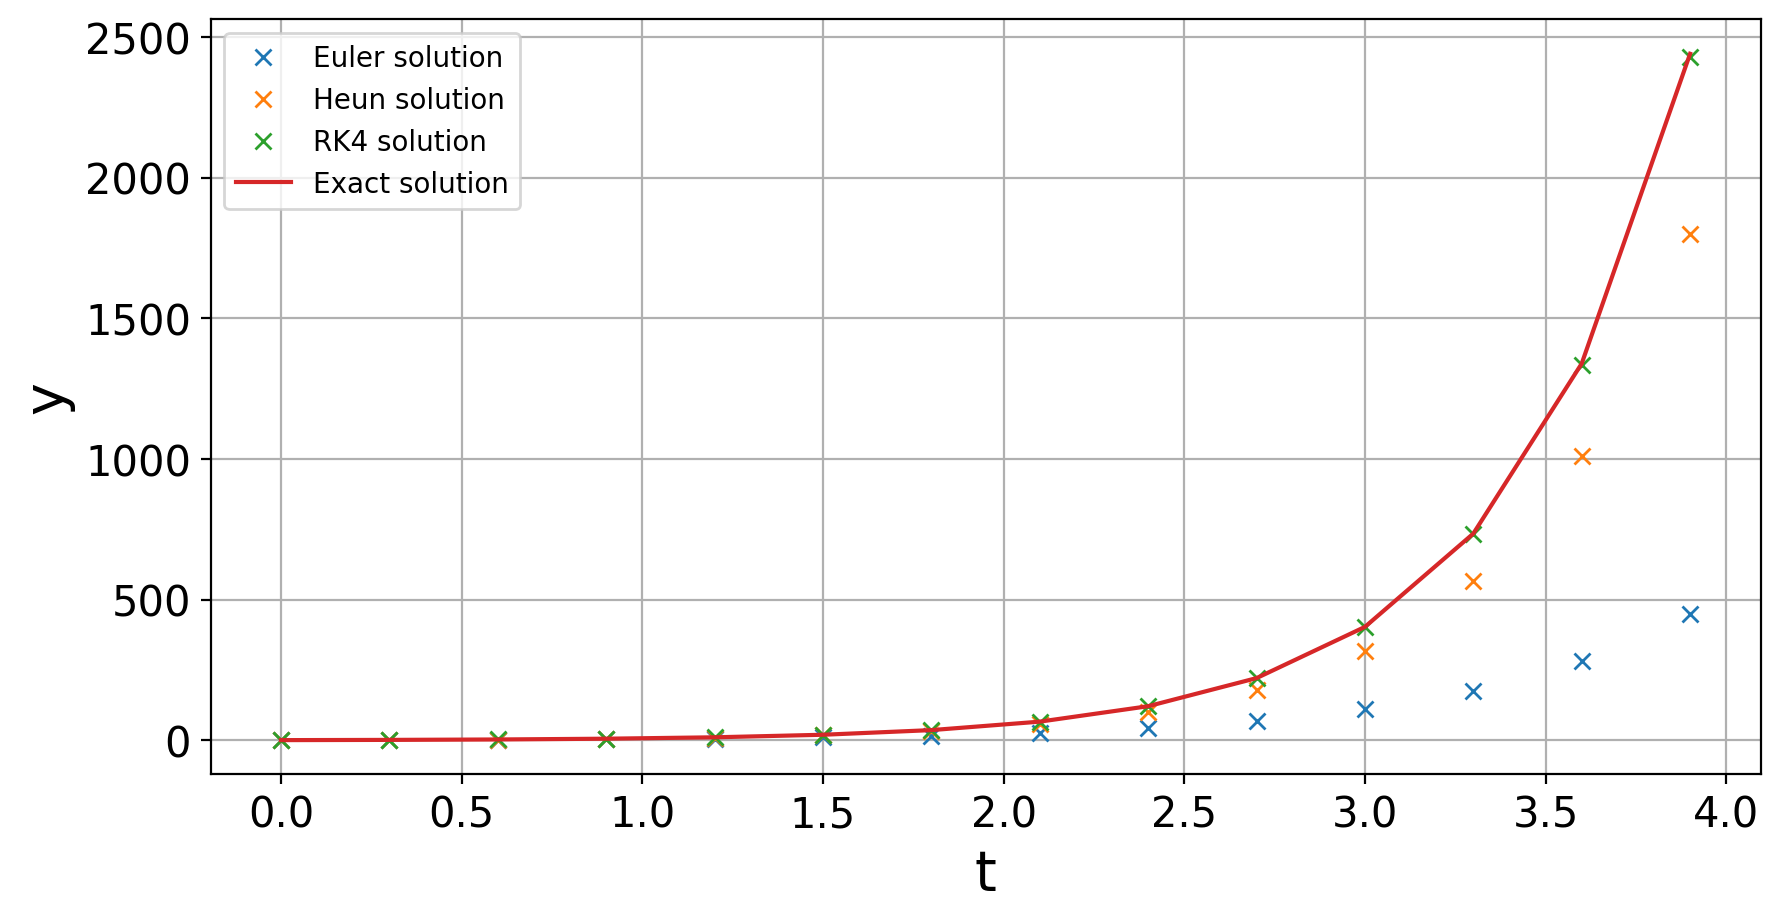

In [9]:
#Comparison between integrators
plt.plot(t, y_euler, 'x', label='Euler solution')
plt.plot(t, y_heun, 'x', label='Heun solution')
plt.plot(t, y_rk4, 'x', label='RK4 solution')
plt.plot(t, y_exact, label='Exact solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

### 2-d Differential Equation

Now, we are going to take a look at an application of $2^{nd}$ order differential equation, in particular mass-spring problem.
\begin{align}
m \frac{d^{2}y}{dt^2} &= -k y
\end{align}
Assume for simplicity $\frac{k}{m} = 1$ where $k$ is the spring constant and $m$ is the mass. Our problem turns into: 
\begin{align}
\frac{d^{2}y}{dt^2} &= -y
\end{align}

#### Exact solution

We can solve this equation analytically to find an explicit formulation: $y(t)= Acos(t) + Bsin(t)$ where $A$ and $B$ are some arbitrary constants. Plugging the initial values $y(0)=1$ and $\dot{y}(0)=0$, we can deduce that $A=1$ and $B=0$. So the exact solution can be explicitly represented by the function:<br>
$y(t)=cos(t)$.

In [10]:
# spring mass system
def f(y,t):                 #Definition of ODEs to iterate
    dy = np.zeros_like(y)
    dy[0] = y[1]            #ODE 1
    dy[1] = -y[0]          #ODE 2 
    return dy

In [11]:
y0 = [1,0]
t_init = 0 # initial time
t_final = 80 # final time
h = 0.02 # step size dt
t = np.arange(t_init,t_final,h) # arange time span
y_euler2d = Euler(f, y0, t)
y_heun2d = Heun(f, y0, t)
y_rk2d = rk4(f, y0, t)
y_exact2d = np.cos(t)

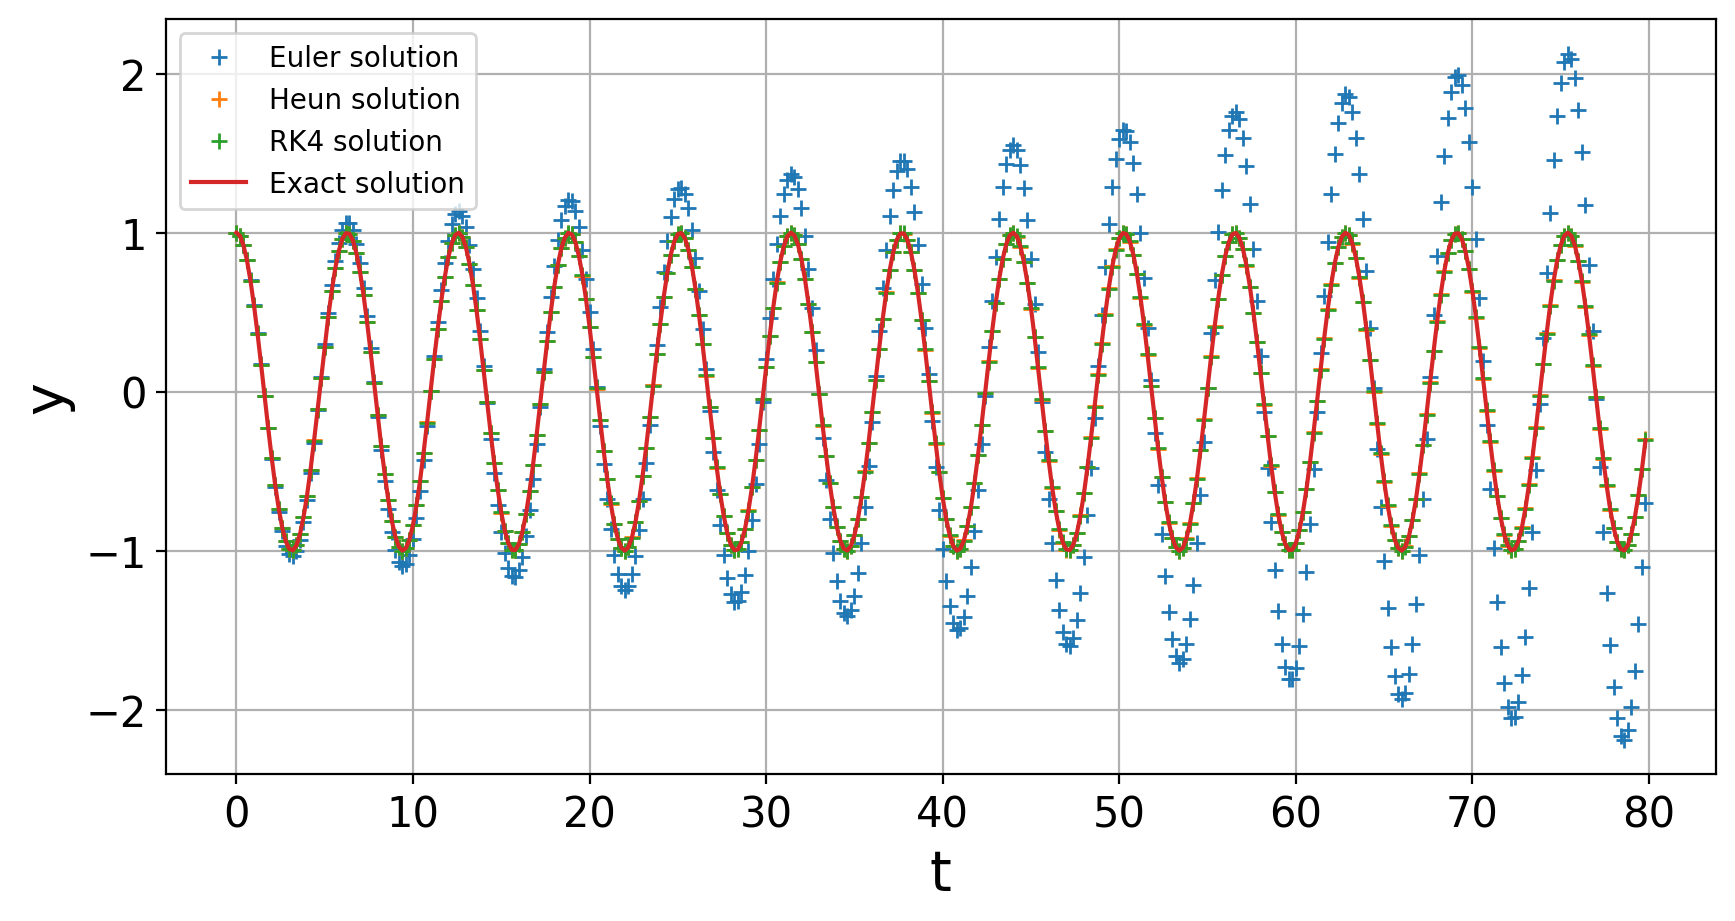

In [12]:
sampling_rate = 10
plt.plot(t[::sampling_rate], y_euler2d[::sampling_rate,0], '+', label='Euler solution')
plt.plot(t[::sampling_rate], y_heun2d[::sampling_rate,0], '+', label='Heun solution')
plt.plot(t[::sampling_rate], y_rk2d[::sampling_rate,0], '+', label='RK4 solution')
plt.plot(t[::sampling_rate], y_exact2d[::sampling_rate], '-', label='Exact solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# Synchronization of Linear Systems

### Synchronization of two linearly coupled linear systems

Analytical investigation predicts that these two systems synchronize at:

\begin{align}
\alpha_c = \frac{a}{2} 
\end{align}

So, as long as

\begin{align}
\alpha \gt \frac{a}{2} 
\end{align}

synchronization occurs.

\begin{aligned}
\dot{y_1} &= ay_1 + \alpha (y_2 - y_1)\\
\dot{y_2} &= ay_2 + \alpha (y_1 - y_2)
\end{aligned}



In [13]:
def coupling_linear(y, t):                 #Definition of ODEs to iterate
    dy = np.zeros_like(y)
    dy[0] = a*y[0] + alpha*(y[1] - y[0])             
    dy[1] = a*y[1] + alpha*(y[0] - y[1])       
    return dy

In [14]:
y0 = [1,20]
t_init = 0 # initial time
t_final = 2. # final time
h = 0.05 # step size dt
t = np.arange(t_init,t_final,h) # arange time span
a = 2
alpha = 1.2

In [15]:
y_2coupling = rk4(coupling_linear, y0, t)

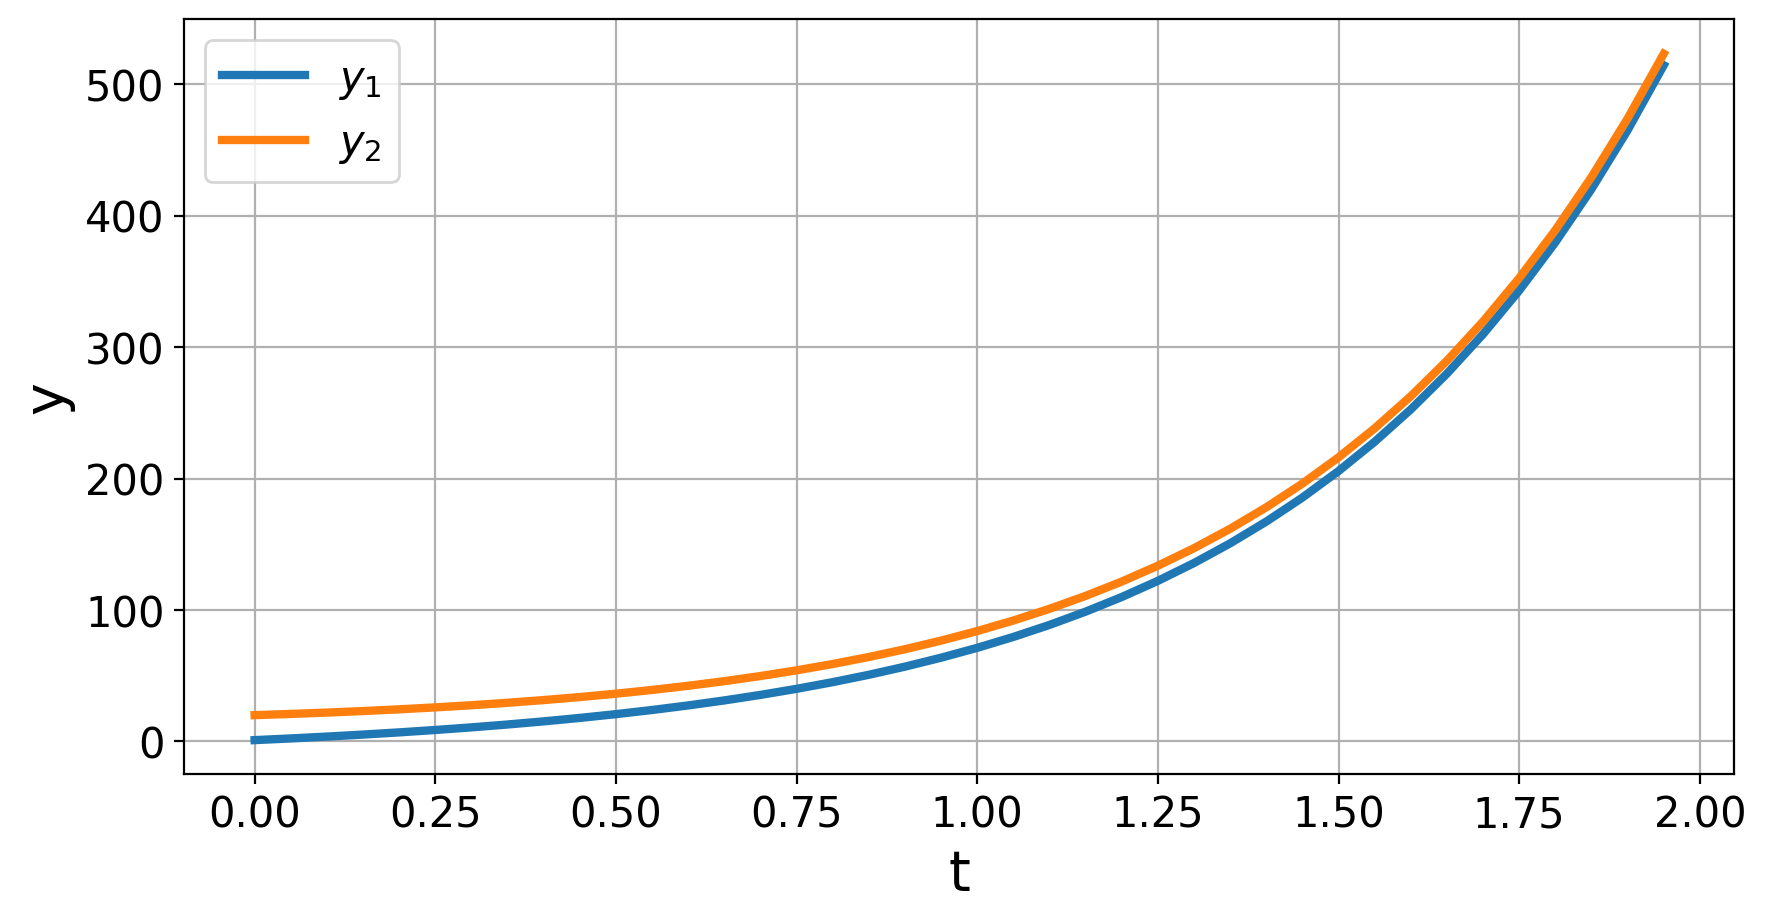

In [16]:
plt.plot(t, y_2coupling,'-',lw=3) 
plt.legend([r'$y_1$',r'$y_2$'], fontsize=15)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

The synchronization error can be defined by:
\begin{align}
E = \frac{1}{N(N-1)}\sum_{i,j\gt 1} |x_i - x_j|
\end{align}
But as $\|x_i - x_j\| = \|x_j - x_i\| $, this sum could be written as:

\begin{align}
E = \frac{2}{N(N-1)}\sum_{i = 1}^{N} \sum_{j=1}^{i} |x_i - x_j|
\end{align}



In [17]:
def SyncError(y):
    N = y.shape[1]
    T = y.shape[0]
    Error = np.zeros(T)
    for t in range(T):
        for i in range(N):
            for j in range(i):
                Error[t] +=  abs( y[t,i] - y[t,j])
    return Error * (2) / (N*(N-1))    

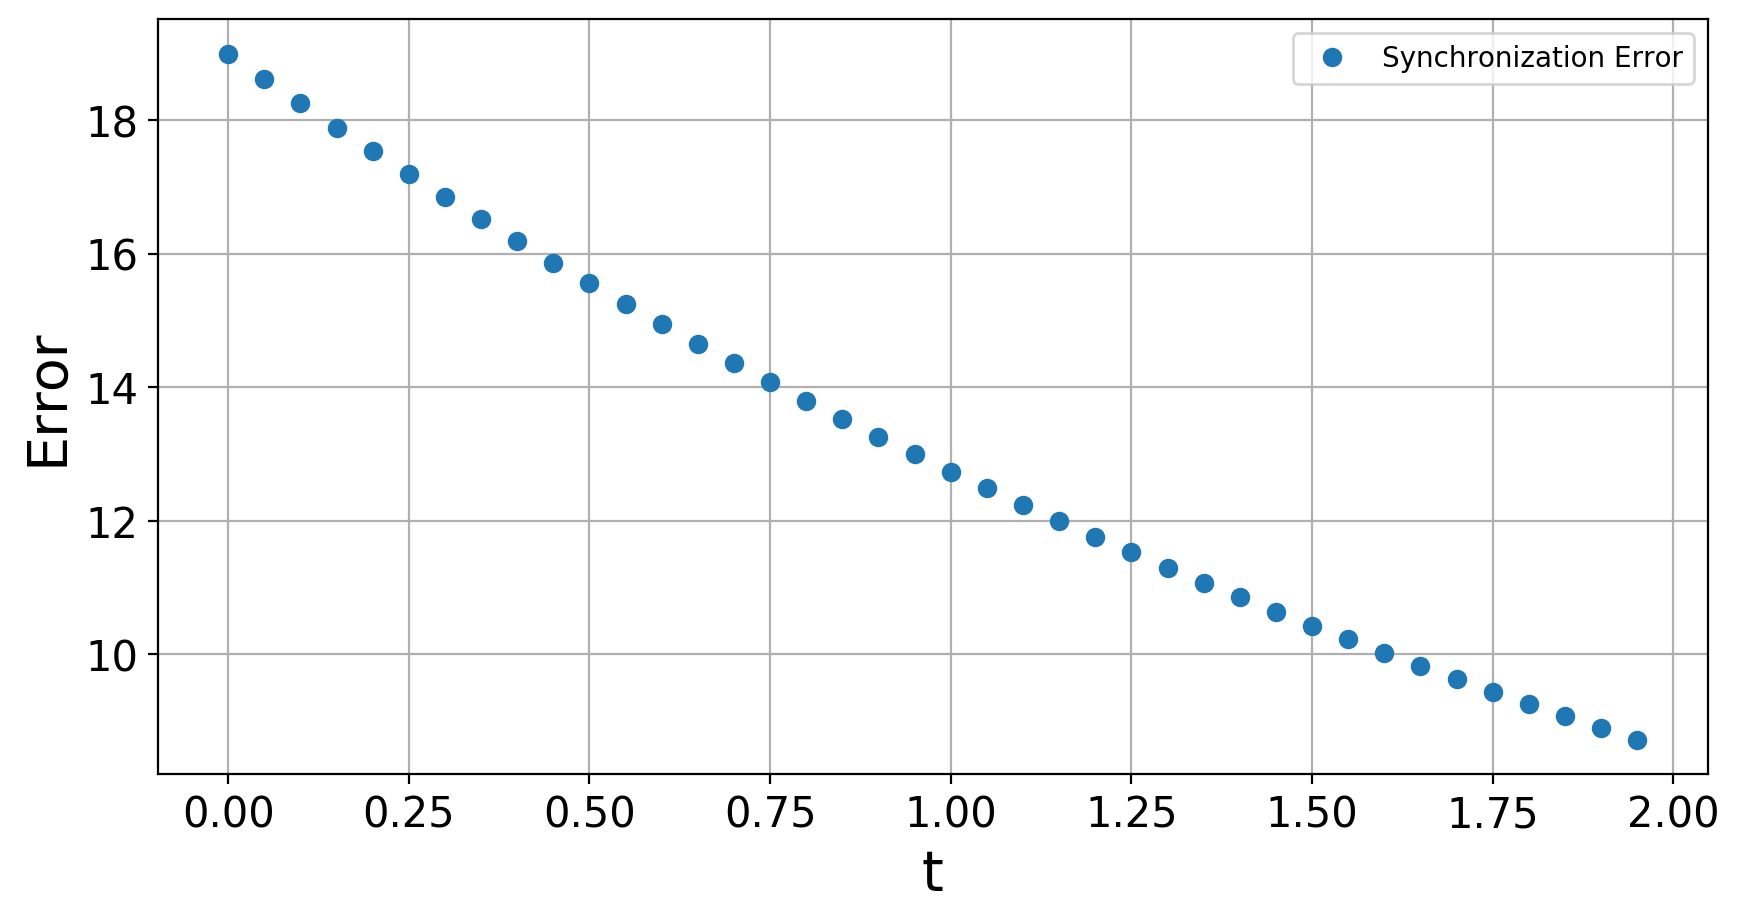

In [18]:
# Plotting synchronization error for 2 linearly coupled systems
Error = SyncError(y_2coupling)
plt.plot(t, Error ,'o', label=r'Synchronization Error') 
plt.xlabel('t')
plt.ylabel('Error') 
plt.legend()
plt.show()

### Synchronization of N linearly coupled linear systems

Analytical investigation predicts that these N systems synchronize at:

\begin{align}
\alpha_c = \frac{a}{N} 
\end{align}

where $N$ is the number of variables. So, as long as

\begin{align}
\alpha \gt \frac{a}{N} 
\end{align}

systems will synchronize.


Model:

\begin{align}
\dot{y_i} = ay_i + \alpha \sum_{j=1}^{N} (y_j - y_i)
\end{align}

In [19]:
def linear_n_coupling(y,t):
    dy = np.zeros_like(y)
    dy[:] = a*y[:] + (alpha)*(np.sum(y) - len(y)*y[:])
    return dy

In [20]:
N = 7 # N: number of coupled linear systems
a = 7
t_init = 0 # initial time
t_final = 0.3 # final time
h = 0.001 # step size dt
t = np.arange(t_init,t_final,h) # arange time span
y0 = np.random.uniform(0, 1000, N)

We can see how the behaviour of the ensemble changes when we change the value of the coupling strength around the critical value, $\alpha_c$ :

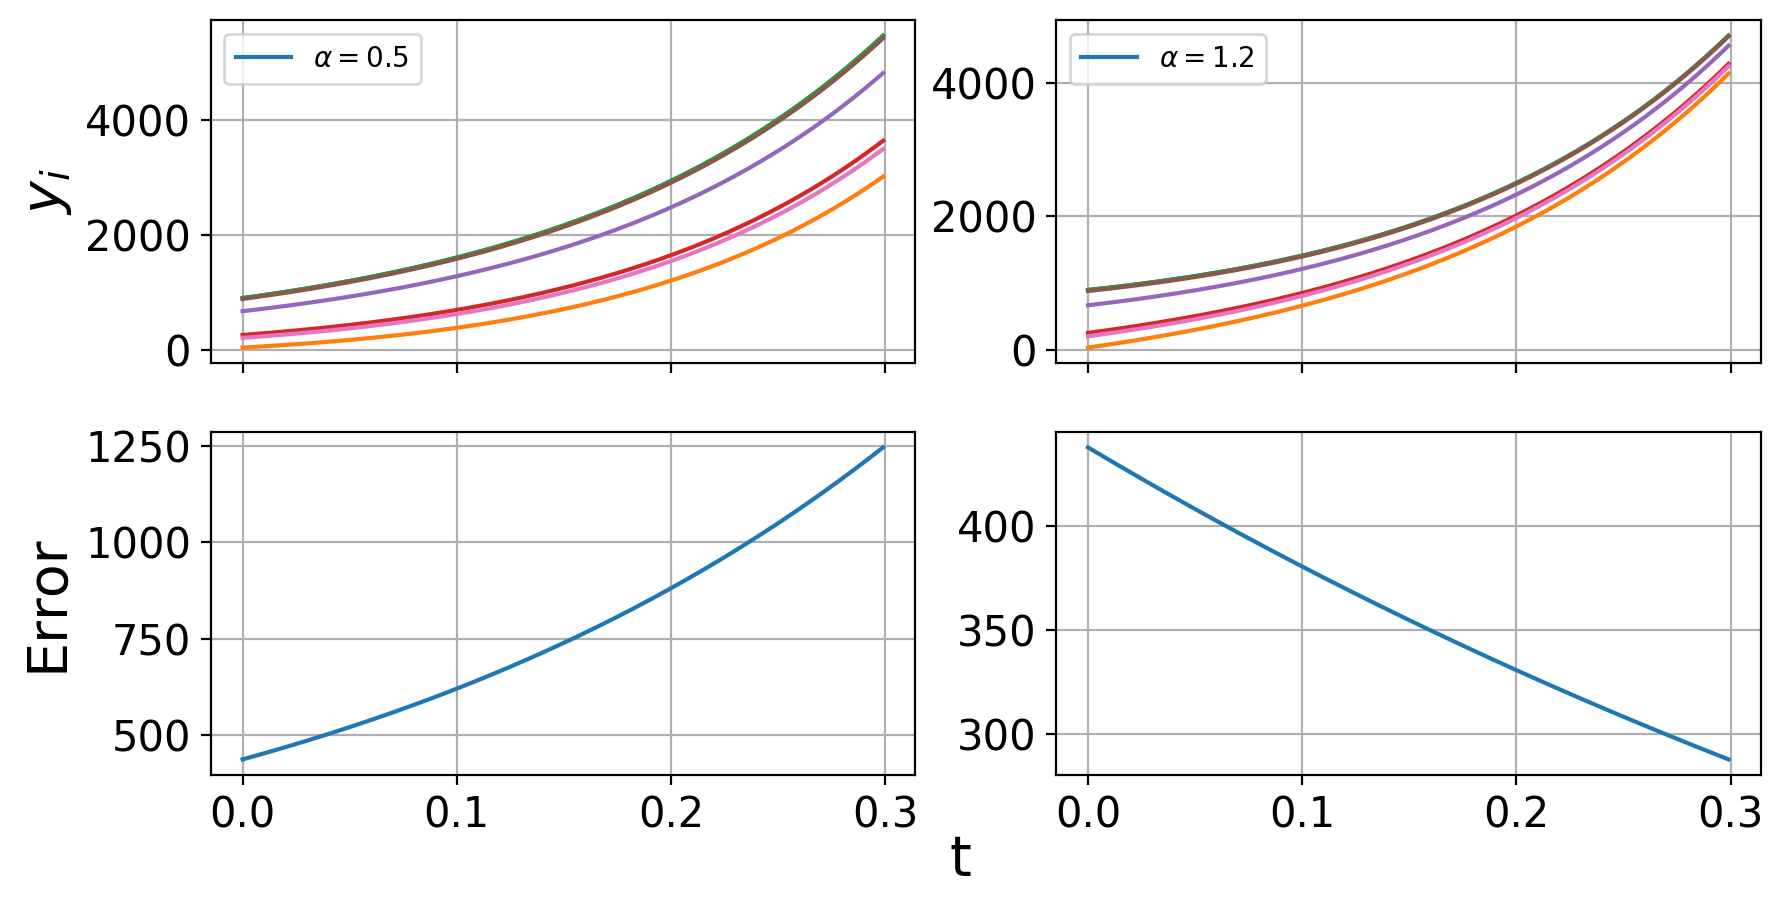

In [21]:
alpha = 0.5
y_Ncoupling1 = rk4(linear_n_coupling, y0, t)
Error1 = SyncError(y_Ncoupling1)
alpha = 1.2
y_Ncoupling2 = rk4(linear_n_coupling, y0, t)
Error2 = SyncError(y_Ncoupling2)

fig, axs = plt.subplots(2,2,sharex=True,sharey=False)
axs[0, 0].plot(t, y_Ncoupling1, '-')
axs[0, 0].set_ylabel(r'$y_i$')
axs[0, 0].legend([r'$\alpha=0.5$'])
axs[0, 1].plot(t, y_Ncoupling2, '-')
axs[0, 1].legend([r'$\alpha=1.2$'])
axs[1, 0].plot(t, Error1)
axs[1, 0].set_ylabel('Error')
axs[1, 1].plot(t, Error2)
fig.text(0.5, 0.04, 't', ha='center', va='center', fontsize=20)
plt.grid('minor')
plt.show()